In [97]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [98]:
df = pd.read_csv('data/houses.csv')
df['a'] = zip(df.suburb, df.postcode)

def a(x):
    s, p = x
    return s + '-VIC-' + str(p)
    
l = df.a.map(a).unique()
l = [x.replace(' ', '-') for x in l]
l.remove('MELBOURNE-(3004)-VIC-3004')

len(l)

1771

# Scraping

In [99]:
from selenium import webdriver
from bs4 import BeautifulSoup as Soup
import csv
import numpy as np

def getinfo(url):
    browser = webdriver.Chrome(executable_path="chromedriver/chromedriver")
    browser.get(url)
    
    try:
        # 1 bed unit
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/a").click()
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/ul/li[1]/a").click()
        s = browser.find_elements_by_class_name('hood-buying-stat')
        _1bed_unit_median_price = s[0].text
        _1bed_unit_days = s[1].text
        _1bed_unit_clearance = s[2].text
        _1bed_unit_sold = s[3].text

        # 2 bed unit
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/a").click()
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/ul/li[2]/a").click()
        s = browser.find_elements_by_class_name('hood-buying-stat')
        _2bed_unit_median_price = s[0].text
        _2bed_unit_days = s[1].text
        _2bed_unit_clearance = s[2].text
        _2bed_unit_sold = s[3].text

        # 3 bed unit
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/a").click()
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/ul/li[3]/a").click()
        s = browser.find_elements_by_class_name('hood-buying-stat')
        _3bed_unit_median_price = s[0].text
        _3bed_unit_days = s[1].text
        _3bed_unit_clearance = s[2].text
        _3bed_unit_sold = s[3].text

        # 2 bed house
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/a").click()
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/ul/li[4]/a").click()
        s = browser.find_elements_by_class_name('hood-buying-stat')
        _2bed_house_median_price = s[0].text
        _2bed_house_days = s[1].text
        _2bed_house_clearance = s[2].text
        _2bed_house_sold = s[3].text

        # 3 bed house
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/a").click()
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/ul/li[5]/a").click()
        s = browser.find_elements_by_class_name('hood-buying-stat')
        _3bed_house_median_price = s[0].text
        _3bed_house_days = s[1].text
        _3bed_house_clearance = s[2].text
        _3bed_house_sold = s[3].text

        # 4 bed house
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/a").click()
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/ul/li[6]/a").click()
        s = browser.find_elements_by_class_name('hood-buying-stat')
        _4bed_house_median_price = s[0].text
        _4bed_house_days = s[1].text
        _4bed_house_clearance = s[2].text
        _4bed_house_sold = s[3].text
    except:
        _1bed_unit_median_price = np.nan
        _1bed_unit_days = np.nan
        _1bed_unit_clearance = np.nan
        _1bed_unit_sold = np.nan
        
        _2bed_unit_median_price = np.nan
        _2bed_unit_days = np.nan
        _2bed_unit_clearance = np.nan
        _2bed_unit_sold = np.nan
        
        _3bed_unit_median_price = np.nan
        _3bed_unit_days = np.nan
        _3bed_unit_clearance = np.nan
        _3bed_unit_sold = np.nan
        
        _2bed_house_median_price = np.nan
        _2bed_house_days = np.nan
        _2bed_house_clearance = np.nan
        _2bed_house_sold = np.nan
        
        _3bed_house_median_price = np.nan
        _3bed_house_days = np.nan
        _3bed_house_clearance = np.nan
        _3bed_house_sold = np.nan
        
        _4bed_house_median_price = np.nan
        _4bed_house_days = np.nan
        _4bed_house_clearance = np.nan
        _4bed_house_sold = np.nan

    html = browser.page_source
    soup = Soup(html, 'lxml')

    # close browser
    browser.quit()

    name = soup.find('header', class_='hood-location-header').text
    
    try:
        travel2csb = soup.find('p', id='travelTrain').text
    except:
        travel2csb = np.nan

    chart = soup.find_all('div', class_='demographics-chart-data')
    
    try:
        age = chart[0].text
    except:
        age = np.nan
        
    try:
        dependency = chart[1].text
        dependency_family = dependency.split()[0]
        dependency_single = dependency.split()[1]
    except:
        dependency_family = np.nan
        dependency_single = np.nan
        
    try:
        occupation1 = soup.find_all('span', class_='bar-label')[0].text
        occupation2 = soup.find_all('span', class_='bar-label')[1].text
        occupation3 = soup.find_all('span', class_='bar-label')[2].text
    except:
        occupation1 = np.nan
        occupation2 = np.nan
        occupation3 = np.nan
        
    try:
        fullyowned = chart[3].text.split()[0]
        purchasing = chart[3].text.split()[1]
        renting = chart[3].text.split()[2]
    except:
        fullyowned = np.nan
        purchasing = np.nan
        renting = np.nan

    school = soup.find_all('div', class_='school-catchment__school-title-and-tags-container')
    numberofschool = len(school)

    result = [name, travel2csb, age, dependency_family, dependency_single,
              occupation1, occupation2, occupation3, fullyowned, purchasing,
              renting, numberofschool, 
              _1bed_unit_median_price, _1bed_unit_days, _1bed_unit_clearance, _1bed_unit_sold,
              _2bed_unit_median_price, _2bed_unit_days, _2bed_unit_clearance, _2bed_unit_sold,
              _3bed_unit_median_price, _3bed_unit_days, _3bed_unit_clearance, _3bed_unit_sold,
              _2bed_house_median_price, _2bed_house_days, _2bed_house_clearance, _2bed_house_sold,
              _3bed_house_median_price, _3bed_house_days, _3bed_house_clearance, _3bed_house_sold,
              _4bed_house_median_price, _4bed_house_days, _4bed_house_clearance, _4bed_house_sold]
    return result

base_url = 'https://www.domain.com.au/suburb-profile/'

columns = ['suburbname', 'travel2csb', 'age', 'dependency_family', 'dependency_single',
              'occupation1', 'occupation2', 'occupation3', 'fullyowned', 'purchasing',
              'renting', 'numberofschool', 
              '_1bed_unit_median_price', '_1bed_unit_days', '_1bed_unit_clearance', '_1bed_unit_sold',
              '_2bed_unit_median_price', '_2bed_unit_days', '_2bed_unit_clearance', '_2bed_unit_sold',
              '_3bed_unit_median_price', '_3bed_unit_days', '_3bed_unit_clearance', '_3bed_unit_sold',
              '_2bed_house_median_price', '_2bed_house_days', '_2bed_house_clearance', '_2bed_house_sold',
              '_3bed_house_median_price', '_3bed_house_days', '_3bed_house_clearance', '_3bed_house_sold',
              '_4bed_house_median_price', '_4bed_house_days', '_4bed_house_clearance', '_4bed_house_sold']

with open('subur.csv','wb') as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        writer.writerow(columns)
        
        for i in l:
            url = base_url + i
            print url
            writer.writerow(getinfo(url))
            


https://www.domain.com.au/suburb-profile/MELBOURNE-VIC-3000
https://www.domain.com.au/suburb-profile/EAST-MELBOURNE-VIC-3002
https://www.domain.com.au/suburb-profile/WEST-MELBOURNE-VIC-3003
https://www.domain.com.au/suburb-profile/MELBOURNE-3004-VIC-3004
https://www.domain.com.au/suburb-profile/SOUTHBANK-VIC-3006
https://www.domain.com.au/suburb-profile/SOUTH-WHARF-VIC-3006
https://www.domain.com.au/suburb-profile/DOCKLANDS-VIC-3008
https://www.domain.com.au/suburb-profile/FOOTSCRAY-VIC-3011
https://www.domain.com.au/suburb-profile/SEDDON-VIC-3011
https://www.domain.com.au/suburb-profile/KINGSVILLE-VIC-3012
https://www.domain.com.au/suburb-profile/BROOKLYN-VIC-3012
https://www.domain.com.au/suburb-profile/MAIDSTONE-VIC-3012
https://www.domain.com.au/suburb-profile/WEST-FOOTSCRAY-VIC-3012
https://www.domain.com.au/suburb-profile/YARRAVILLE-VIC-3013
https://www.domain.com.au/suburb-profile/NEWPORT-VIC-3015
https://www.domain.com.au/suburb-profile/SOUTH-KINGSVILLE-VIC-3015
https://www.dom

https://www.domain.com.au/suburb-profile/KEILOR-EAST-VIC-3033
https://www.domain.com.au/suburb-profile/AVONDALE-HEIGHTS-VIC-3034
https://www.domain.com.au/suburb-profile/KEILOR-VIC-3036
https://www.domain.com.au/suburb-profile/HILLSIDE-VIC-3037
https://www.domain.com.au/suburb-profile/SYDENHAM-VIC-3037
https://www.domain.com.au/suburb-profile/DELAHEY-VIC-3037
https://www.domain.com.au/suburb-profile/TAYLORS-HILL-VIC-3037
https://www.domain.com.au/suburb-profile/KEILOR-DOWNS-VIC-3038
https://www.domain.com.au/suburb-profile/TAYLORS-LAKES-VIC-3038
https://www.domain.com.au/suburb-profile/KEILOR-LODGE-VIC-3038
https://www.domain.com.au/suburb-profile/MOONEE-PONDS-VIC-3039
https://www.domain.com.au/suburb-profile/ESSENDON-VIC-3040
https://www.domain.com.au/suburb-profile/ABERFELDIE-VIC-3040
https://www.domain.com.au/suburb-profile/ESSENDON-WEST-VIC-3040
https://www.domain.com.au/suburb-profile/ESSENDON-NORTH-VIC-3041
https://www.domain.com.au/suburb-profile/STRATHMORE-VIC-3041
https://www.

https://www.domain.com.au/suburb-profile/BOX-HILL-NORTH-VIC-3129
https://www.domain.com.au/suburb-profile/MONT-ALBERT-NORTH-VIC-3129
https://www.domain.com.au/suburb-profile/BLACKBURN-VIC-3130
https://www.domain.com.au/suburb-profile/BLACKBURN-NORTH-VIC-3130
https://www.domain.com.au/suburb-profile/BLACKBURN-SOUTH-VIC-3130
https://www.domain.com.au/suburb-profile/FOREST-HILL-VIC-3131
https://www.domain.com.au/suburb-profile/NUNAWADING-VIC-3131
https://www.domain.com.au/suburb-profile/MITCHAM-VIC-3132
https://www.domain.com.au/suburb-profile/VERMONT-VIC-3133
https://www.domain.com.au/suburb-profile/VERMONT-SOUTH-VIC-3133
https://www.domain.com.au/suburb-profile/RINGWOOD-VIC-3134
https://www.domain.com.au/suburb-profile/WARRANWOOD-VIC-3134
https://www.domain.com.au/suburb-profile/RINGWOOD-NORTH-VIC-3134
https://www.domain.com.au/suburb-profile/WARRANDYTE-SOUTH-VIC-3134
https://www.domain.com.au/suburb-profile/RINGWOOD-EAST-VIC-3135
https://www.domain.com.au/suburb-profile/HEATHMONT-VIC-3

https://www.domain.com.au/suburb-profile/FRANKSTON-SOUTH-VIC-3199
https://www.domain.com.au/suburb-profile/FRANKSTON-NORTH-VIC-3200
https://www.domain.com.au/suburb-profile/CARRUM-DOWNS-VIC-3201
https://www.domain.com.au/suburb-profile/HEATHERTON-VIC-3202
https://www.domain.com.au/suburb-profile/BENTLEIGH-VIC-3204
https://www.domain.com.au/suburb-profile/ORMOND-VIC-3204
https://www.domain.com.au/suburb-profile/MCKINNON-VIC-3204
https://www.domain.com.au/suburb-profile/SOUTH-MELBOURNE-VIC-3205
https://www.domain.com.au/suburb-profile/ALBERT-PARK-VIC-3206
https://www.domain.com.au/suburb-profile/MIDDLE-PARK-VIC-3206
https://www.domain.com.au/suburb-profile/PORT-MELBOURNE-VIC-3207
https://www.domain.com.au/suburb-profile/LITTLE-RIVER-VIC-3211
https://www.domain.com.au/suburb-profile/LARA-VIC-3212
https://www.domain.com.au/suburb-profile/AVALON-VIC-3212
https://www.domain.com.au/suburb-profile/LOVELY-BANKS-VIC-3213
https://www.domain.com.au/suburb-profile/NORLANE-VIC-3214
https://www.domai

https://www.domain.com.au/suburb-profile/ONDIT-VIC-3249
https://www.domain.com.au/suburb-profile/WOOL-WOOL-VIC-3249
https://www.domain.com.au/suburb-profile/BALINTORE-VIC-3249
https://www.domain.com.au/suburb-profile/IRREWILLIPE-EAST-VIC-3249
https://www.domain.com.au/suburb-profile/YEODENE-VIC-3249
https://www.domain.com.au/suburb-profile/COLAC-VIC-3250
https://www.domain.com.au/suburb-profile/ELLIMINYT-VIC-3250
https://www.domain.com.au/suburb-profile/COLAC-EAST-VIC-3250
https://www.domain.com.au/suburb-profile/COLAC-WEST-VIC-3250
https://www.domain.com.au/suburb-profile/BEEAC-VIC-3251
https://www.domain.com.au/suburb-profile/EURACK-VIC-3251
https://www.domain.com.au/suburb-profile/WEERING-VIC-3251
https://www.domain.com.au/suburb-profile/COROROOKE-VIC-3254
https://www.domain.com.au/suburb-profile/SOUTH-PURRUMBETE-VIC-3260
https://www.domain.com.au/suburb-profile/CAMPERDOWN-VIC-3260
https://www.domain.com.au/suburb-profile/STONYFORD-VIC-3260
https://www.domain.com.au/suburb-profile/P

https://www.domain.com.au/suburb-profile/HOPETOUN-PARK-VIC-3340
https://www.domain.com.au/suburb-profile/MYRNIONG-VIC-3341
https://www.domain.com.au/suburb-profile/DALES-CREEK-VIC-3341
https://www.domain.com.au/suburb-profile/GREENDALE-VIC-3341
https://www.domain.com.au/suburb-profile/BALLAN-VIC-3342
https://www.domain.com.au/suburb-profile/BEREMBOKE-VIC-3342
https://www.domain.com.au/suburb-profile/MOUNT-WALLACE-VIC-3342
https://www.domain.com.au/suburb-profile/INGLISTON-VIC-3342
https://www.domain.com.au/suburb-profile/GORDON-VIC-3345
https://www.domain.com.au/suburb-profile/BALLARAT-VIC-3350
https://www.domain.com.au/suburb-profile/BALLARAT-NORTH-VIC-3350
https://www.domain.com.au/suburb-profile/MOUNT-CLEAR-VIC-3350
https://www.domain.com.au/suburb-profile/SOLDIERS-HILL-VIC-3350
https://www.domain.com.au/suburb-profile/ALFREDTON-VIC-3350
https://www.domain.com.au/suburb-profile/BALLARAT-CENTRAL-VIC-3350
https://www.domain.com.au/suburb-profile/BALLARAT-EAST-VIC-3350
https://www.doma

https://www.domain.com.au/suburb-profile/BUANGOR-VIC-3375
https://www.domain.com.au/suburb-profile/GREAT-WESTERN-VIC-3377
https://www.domain.com.au/suburb-profile/MOYSTON-VIC-3377
https://www.domain.com.au/suburb-profile/ARARAT-VIC-3377
https://www.domain.com.au/suburb-profile/CROWLANDS-VIC-3377
https://www.domain.com.au/suburb-profile/WARRAK-VIC-3377
https://www.domain.com.au/suburb-profile/MOUNT-COLE-CREEK-VIC-3377
https://www.domain.com.au/suburb-profile/ARMSTRONG-VIC-3377
https://www.domain.com.au/suburb-profile/CATHCART-VIC-3377
https://www.domain.com.au/suburb-profile/WILLAURA-VIC-3379
https://www.domain.com.au/suburb-profile/WICKLIFFE-VIC-3379
https://www.domain.com.au/suburb-profile/STAWELL-VIC-3380
https://www.domain.com.au/suburb-profile/HALLS-GAP-VIC-3381
https://www.domain.com.au/suburb-profile/DEEP-LEAD-VIC-3381
https://www.domain.com.au/suburb-profile/POMONAL-VIC-3381
https://www.domain.com.au/suburb-profile/BLACK-RANGE-VIC-3381
https://www.domain.com.au/suburb-profile/BE

https://www.domain.com.au/suburb-profile/WHEATSHEAF-VIC-3461
https://www.domain.com.au/suburb-profile/DRUMMOND-VIC-3461
https://www.domain.com.au/suburb-profile/MOUNT-FRANKLIN-VIC-3461
https://www.domain.com.au/suburb-profile/BULLARTO-VIC-3461
https://www.domain.com.au/suburb-profile/COOMOORA-VIC-3461
https://www.domain.com.au/suburb-profile/DENVER-VIC-3461
https://www.domain.com.au/suburb-profile/EGANSTOWN-VIC-3461
https://www.domain.com.au/suburb-profile/GLENLYON-VIC-3461
https://www.domain.com.au/suburb-profile/HEPBURN-VIC-3461
https://www.domain.com.au/suburb-profile/MUSK-VIC-3461
https://www.domain.com.au/suburb-profile/PORCUPINE-RIDGE-VIC-3461
https://www.domain.com.au/suburb-profile/SHEPHERDS-FLAT-VIC-3461
https://www.domain.com.au/suburb-profile/LEONARDS-HILL-VIC-3461
https://www.domain.com.au/suburb-profile/LYONVILLE-VIC-3461
https://www.domain.com.au/suburb-profile/MUSK-VALE-VIC-3461
https://www.domain.com.au/suburb-profile/YANDOIT-VIC-3461
https://www.domain.com.au/suburb-pr

https://www.domain.com.au/suburb-profile/HUNTLY-VIC-3551
https://www.domain.com.au/suburb-profile/JUNORTOUN-VIC-3551
https://www.domain.com.au/suburb-profile/EPSOM-VIC-3551
https://www.domain.com.au/suburb-profile/STRATHFIELDSAYE-VIC-3551
https://www.domain.com.au/suburb-profile/ASCOT-VIC-3551
https://www.domain.com.au/suburb-profile/AXE-CREEK-VIC-3551
https://www.domain.com.au/suburb-profile/LOCKWOOD-VIC-3551
https://www.domain.com.au/suburb-profile/LOCKWOOD-SOUTH-VIC-3551
https://www.domain.com.au/suburb-profile/MAIDEN-GULLY-VIC-3551
https://www.domain.com.au/suburb-profile/MANDURANG-VIC-3551
https://www.domain.com.au/suburb-profile/PAINSWICK-VIC-3551
https://www.domain.com.au/suburb-profile/TOOLLEEN-VIC-3551
https://www.domain.com.au/suburb-profile/EMU-CREEK-VIC-3551
https://www.domain.com.au/suburb-profile/LONGLEA-VIC-3551
https://www.domain.com.au/suburb-profile/AXEDALE-VIC-3551
https://www.domain.com.au/suburb-profile/MANDURANG-SOUTH-VIC-3551
https://www.domain.com.au/suburb-prof

https://www.domain.com.au/suburb-profile/DRUMANURE-VIC-3636
https://www.domain.com.au/suburb-profile/WAAIA-VIC-3637
https://www.domain.com.au/suburb-profile/NATHALIA-VIC-3638
https://www.domain.com.au/suburb-profile/KOTUPNA-VIC-3638
https://www.domain.com.au/suburb-profile/BARMAH-VIC-3639
https://www.domain.com.au/suburb-profile/KATUNGA-VIC-3640
https://www.domain.com.au/suburb-profile/BEARII-VIC-3641
https://www.domain.com.au/suburb-profile/STRATHMERTON-VIC-3641
https://www.domain.com.au/suburb-profile/COBRAM-VIC-3644
https://www.domain.com.au/suburb-profile/YARROWEYAH-VIC-3644
https://www.domain.com.au/suburb-profile/BAROOGA-VIC-3644
https://www.domain.com.au/suburb-profile/COBRAM-EAST-VIC-3644
https://www.domain.com.au/suburb-profile/DOOKIE-VIC-3646
https://www.domain.com.au/suburb-profile/YABBA-NORTH-VIC-3646
https://www.domain.com.au/suburb-profile/KATAMATITE-VIC-3649
https://www.domain.com.au/suburb-profile/STRATH-CREEK-VIC-3658
https://www.domain.com.au/suburb-profile/BROADFORD-

https://www.domain.com.au/suburb-profile/YARCK-VIC-3719
https://www.domain.com.au/suburb-profile/BONNIE-DOON-VIC-3720
https://www.domain.com.au/suburb-profile/MANSFIELD-VIC-3722
https://www.domain.com.au/suburb-profile/BARWITE-VIC-3722
https://www.domain.com.au/suburb-profile/HOWQUA-VIC-3723
https://www.domain.com.au/suburb-profile/SAWMILL-SETTLEMENT-VIC-3723
https://www.domain.com.au/suburb-profile/MERRIJIG-VIC-3723
https://www.domain.com.au/suburb-profile/TOLMIE-VIC-3723
https://www.domain.com.au/suburb-profile/JAMIESON-VIC-3723
https://www.domain.com.au/suburb-profile/BARJARG-VIC-3723
https://www.domain.com.au/suburb-profile/STEWARTON-VIC-3725
https://www.domain.com.au/suburb-profile/WILBY-VIC-3728
https://www.domain.com.au/suburb-profile/BOOMAHNOOMOONAH-VIC-3728
https://www.domain.com.au/suburb-profile/TUNGAMAH-VIC-3728
https://www.domain.com.au/suburb-profile/YARRAWONGA-VIC-3730
https://www.domain.com.au/suburb-profile/BUNDALONG-VIC-3730
https://www.domain.com.au/suburb-profile/BO

https://www.domain.com.au/suburb-profile/GARFIELD-VIC-3814
https://www.domain.com.au/suburb-profile/CORA-LYNN-VIC-3814
https://www.domain.com.au/suburb-profile/GARFIELD-NORTH-VIC-3814
https://www.domain.com.au/suburb-profile/BUNYIP-VIC-3815
https://www.domain.com.au/suburb-profile/IONA-VIC-3815
https://www.domain.com.au/suburb-profile/TONIMBUK-VIC-3815
https://www.domain.com.au/suburb-profile/LONGWARRY-VIC-3816
https://www.domain.com.au/suburb-profile/LONGWARRY-NORTH-VIC-3816
https://www.domain.com.au/suburb-profile/LABERTOUCHE-VIC-3816
https://www.domain.com.au/suburb-profile/MODELLA-VIC-3816
https://www.domain.com.au/suburb-profile/DROUIN-VIC-3818
https://www.domain.com.au/suburb-profile/JINDIVICK-VIC-3818
https://www.domain.com.au/suburb-profile/DROUIN-WEST-VIC-3818
https://www.domain.com.au/suburb-profile/DROUIN-SOUTH-VIC-3818
https://www.domain.com.au/suburb-profile/DROUIN-EAST-VIC-3818
https://www.domain.com.au/suburb-profile/HALLORA-VIC-3818
https://www.domain.com.au/suburb-prof

https://www.domain.com.au/suburb-profile/LINDENOW-VIC-3865
https://www.domain.com.au/suburb-profile/YINNAR-SOUTH-VIC-3869
https://www.domain.com.au/suburb-profile/YINNAR-VIC-3869
https://www.domain.com.au/suburb-profile/JUMBUK-VIC-3869
https://www.domain.com.au/suburb-profile/BOOLARRA-VIC-3870
https://www.domain.com.au/suburb-profile/BOOLARRA-SOUTH-VIC-3870
https://www.domain.com.au/suburb-profile/BUDGEREE-VIC-3870
https://www.domain.com.au/suburb-profile/DOLLAR-VIC-3871
https://www.domain.com.au/suburb-profile/MIRBOO-NORTH-VIC-3871
https://www.domain.com.au/suburb-profile/MIRBOO-VIC-3871
https://www.domain.com.au/suburb-profile/GORMANDALE-VIC-3873
https://www.domain.com.au/suburb-profile/MCLOUGHLINS-BEACH-VIC-3874
https://www.domain.com.au/suburb-profile/BAIRNSDALE-VIC-3875
https://www.domain.com.au/suburb-profile/EAST-BAIRNSDALE-VIC-3875
https://www.domain.com.au/suburb-profile/FORGE-CREEK-VIC-3875
https://www.domain.com.au/suburb-profile/WY-YUNG-VIC-3875
https://www.domain.com.au/su

https://www.domain.com.au/suburb-profile/RUBY-VIC-3953
https://www.domain.com.au/suburb-profile/BERRYS-CREEK-VIC-3953
https://www.domain.com.au/suburb-profile/LEONGATHA-SOUTH-VIC-3953
https://www.domain.com.au/suburb-profile/MOUNT-ECCLES-VIC-3953
https://www.domain.com.au/suburb-profile/WILD-DOG-VALLEY-VIC-3953
https://www.domain.com.au/suburb-profile/HALLSTON-VIC-3953
https://www.domain.com.au/suburb-profile/LEONGATHA-NORTH-VIC-3953
https://www.domain.com.au/suburb-profile/KOOROOMAN-VIC-3953
https://www.domain.com.au/suburb-profile/KOONWARRA-VIC-3954


# Cleaning

In [ ]:
d = pd.read_csv('subur.csv')

In [ ]:
d=d.reset_index()
d.drop('index', axis=1, inplace=True)

In [ ]:
def splitnamepost(x):
    s = x.split('\n')
    return s[1]

d['name'] = d.suburbname.map(splitnamepost)

def splitnamepost(x):
    s = x.split('\n')
    p = s[2].split(', ')[1]
    return p

d['post'] = d.suburbname.map(splitnamepost)

d.drop('suburbname', axis=1, inplace=True)
d.drop('travel2csb', axis=1, inplace=True)

In [ ]:
def getage(x):
    try:
        s = x.split('\n')
        return s[1]
    except:
        return np.nan

d.age = d.age.map(getage)

In [ ]:
# need to be fixed
def extrainfo(x):
    try:
        re = x.split('\n')[1]
        if re == '-':
            return np.nan
        else:
            return re
    except:
        return np.nan

d.iloc[:, 10:-2] = d.iloc[:, 10:-2].applymap(extrainfo)

In [ ]:
d.iloc[:, 10:-2] = d.iloc[:, 10:-2].fillna(0)

def ton(x):
    if x == 0:
        return np.nan
    else:
        if 'k' in x:
            return float(x.replace('k', '')) * 1000
        if 'm' in x:
            return float(x.replace('m', '')) * 1000000

d.iloc[:, 10:-2] = d.iloc[:, 10:-2].applymap(ton)

In [ ]:
d.to_csv('sub.csv', index=False)

# EDA

In [85]:
df = pd.read_csv('data/suburb.csv')

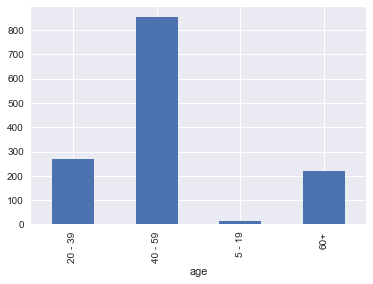

In [86]:
df.groupby(by='age').count()['fullyowned'].plot(kind='bar')

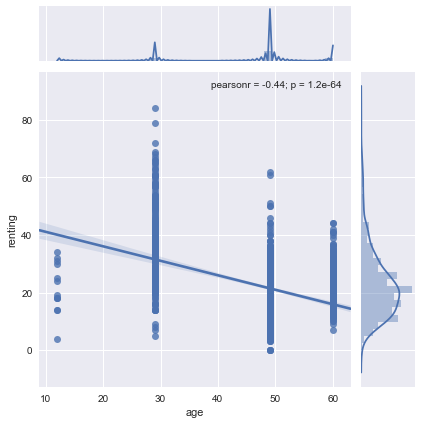

In [87]:
test1 = df[['renting', 'fullyowned', 'purchasing', 'age']]

def age(x):
    try:
        s = x.split()
        if '+' in s[0]:
            return int(s[0].replace('+', ''))
        else:
            return (int(s[0]) + int(s[2])) / 2
    except:
        return np.nan

test1.age = test1.age.map(age)

sns.jointplot('age','renting', data=test1, kind='reg')

In [96]:
df.sort_values(by='_1bed_unit_median_price', ascending=False).head(10)

,age,dependency_family,dependency_single,occupation1,occupation2,occupation3,fullyowned,purchasing,renting,numberofschool,...,_3bed_house_median_price,_3bed_house_days,_3bed_house_clearance,_3bed_house_sold,_4bed_house_median_price,_4bed_house_days,_4bed_house_clearance,_4bed_house_sold,name,post
261,40 - 59,54.0,46.0,Professional/Technical,Health Care/Social,Education & training,45.0,31.0,24.0,3,...,1836000.0,NaN,NaN,NaN,2350000.0,NaN,NaN,NaN,Camberwell,3124
411,20 - 39,39.0,61.0,Professional/Technical,Financial/Insurance,Health Care/Social,24.0,27.0,49.0,2,...,1565000.0,NaN,NaN,NaN,2003000.0,NaN,NaN,NaN,Port Melbourne,3207
377,40 - 59,55.0,45.0,Professional/Technical,Health Care/Social,Retail trade,46.0,27.0,27.0,3,...,2100000.0,NaN,NaN,NaN,3000000.0,NaN,NaN,NaN,Brighton,3186
313,40 - 59,57.0,43.0,Professional/Technical,Health Care/Social,Retail trade,49.0,28.0,24.0,3,...,1151000.0,NaN,NaN,NaN,1265000.0,NaN,NaN,NaN,Glen Waverley,3150
302,60+,47.0,53.0,Professional/Technical,Health Care/Social,Financial/Insurance,41.0,20.0,39.0,3,...,3000000.0,NaN,NaN,NaN,5488000.0,NaN,NaN,NaN,Toorak,3142
1,20 - 39,35.0,65.0,Professional/Technical,Health Care/Social,Financial/Insurance,23.0,20.0,57.0,0,...,3138000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Melbourne,3002
373,20 - 39,29.0,71.0,Professional/Technical,Health Care/Social,Education & training,18.0,24.0,58.0,3,...,1688000.0,NaN,NaN,NaN,2458000.0,NaN,NaN,NaN,Elwood,3184
240,40 - 59,48.0,52.0,Health Care/Social,Professional/Technical,Retail trade,40.0,28.0,32.0,3,...,1745000.0,NaN,NaN,NaN,2293000.0,NaN,NaN,NaN,Kew,3101
189,20 - 39,25.0,75.0,Professional/Technical,Health Care/Social,Education & training,16.0,20.0,63.0,3,...,1461000.0,NaN,NaN,NaN,2430000.0,NaN,NaN,NaN,Fitzroy,3065
370,20 - 39,29.0,71.0,Professional/Technical,Health Care/Social,Financial/Insurance,24.0,20.0,56.0,0,...,1820000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,St Kilda West,3182
